# Youtube streamer analysis
### Top youtube content creators

#### Description
This dataset contains valuable information about the top youtube streamers, including their ranking, categories, subscribers, country, visits, likes, comments, and more. The task is to perform a comprehensive analysis of the dataset to extract insights about the top youtube content creators.

### Load libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [8]:
df = pd.read_csv('youtubers_df.csv')

### 1. Exploring the dataset

In [9]:
# view the first 5 rows of the dataset
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [10]:
# Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [11]:
# Check how many rows and columns the dataset contains
df.shape

(1000, 9)

In [12]:
# Descriptive statistics of the numerical columns of the dataframe
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


##### Identifying key variables

In [13]:
for category in df['Categories'].unique():
    print(category)

Música y baile
Videojuegos, Humor
Educación
nan
Animación, Juguetes
Películas, Videojuegos
Juguetes
Videojuegos
Películas, Animación
Películas
Noticias y Política
Animación, Humor
Música y baile, Animación
Música y baile, Películas
Películas, Juguetes
Películas, Humor
Vlogs diarios
Videojuegos, Juguetes
Animación, Videojuegos
Animación
Música y baile, Humor
Diseño/arte, DIY y Life Hacks
Ciencia y tecnología
Fitness, Salud y autoayuda
Belleza, Moda
Humor
Comida y bebida
Deportes
Fitness
Viajes, Espectáculos
Comida y bebida, Salud y autoayuda
Diseño/arte
DIY y Life Hacks, Juguetes
Educación, Juguetes
Juguetes, Coches y vehículos
Música y baile, Juguetes
Animales y mascotas
ASMR
Moda
DIY y Life Hacks
Diseño/arte, Belleza
Coches y vehículos
Animación, Humor, Juguetes
ASMR, Comida y bebida
Comida y bebida, Juguetes
Juguetes, DIY y Life Hacks


In [14]:
for country in df['Country'].unique():
    print(country)

India
Estados Unidos
Unknown
Brasil
México
Rusia
Pakistán
Filipinas
Indonesia
Tailandia
Francia
Colombia
Iraq
Japón
Ecuador
Argentina
Turquía
Arabia Saudita
El Salvador
Bangladesh
Reino Unido
Argelia
España
Perú
Egipto
Jordania
Marruecos
Singapur
Somalia


##### Checking for missing values

In [15]:
# Check for the sum of any missing values in the columns
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

##### data cleaning

In [16]:
# Rename the 'suscribers' column to 'subscribers'
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

##### Visualizing the visits and subscribers columns and checking for any outliers

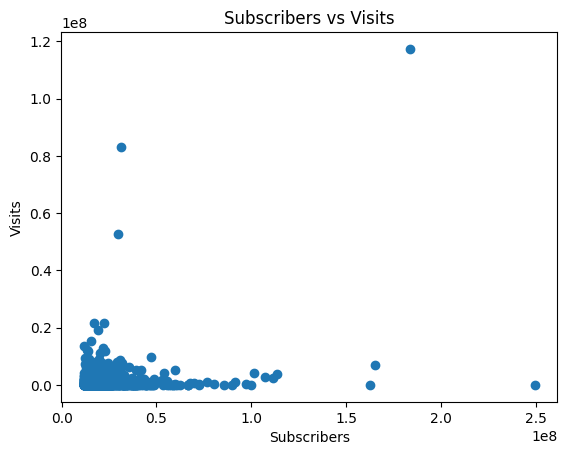

In [17]:
# Scatter plot for 'Subscribers'
plt.scatter(df['Subscribers'], df['Visits'])
plt.xlabel('Subscribers')
plt.ylabel('Visits')
plt.title('Subscribers vs Visits')
plt.show()

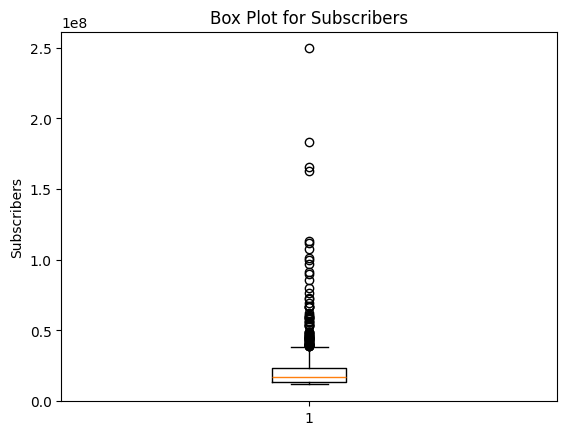

In [18]:
# Box plot for 'Subscribers'
plt.boxplot(df['Subscribers'])
plt.ylabel('Subscribers')
plt.title('Box Plot for Subscribers')
plt.show()

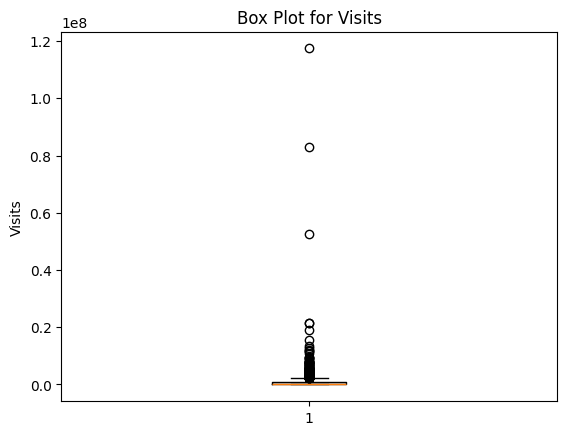

In [19]:
# Box plot for 'Visits'
plt.boxplot(df['Visits'])
plt.ylabel('Visits')
plt.title('Box Plot for Visits')
plt.show()

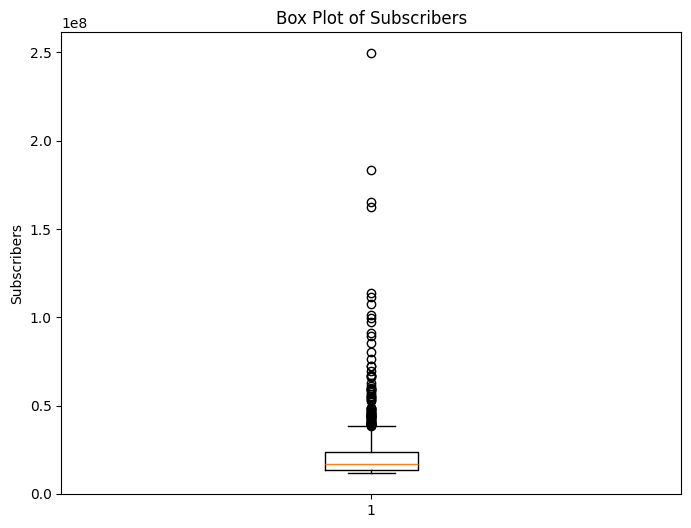

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Subscribers'])
plt.ylabel('Subscribers')
plt.title('Box Plot of Subscribers')
plt.show()

In [21]:
# Using the IQR to explore outliers
print('Using the IQR to find outliers')
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers


outliers = find_outliers_IQR(df[["Subscribers", "Visits", "Likes", "Comments"]])
print("Number of Outliers: " + str(len(outliers)))
print("Max Outlier value: " + str(outliers.max()))
print("Min Outlier value: " + str(outliers.min()))
print(outliers)

def impute_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    df = np.where((df > upper) | (df < lower), df.median(), df)
    return df

Using the IQR to find outliers
Number of Outliers: 1000
Max Outlier value: Subscribers    249500000.0
Visits         117400000.0
Likes            5300000.0
Comments          154000.0
dtype: float64
Min Outlier value: Subscribers    38700000.0
Visits          2200000.0
Likes             71300.0
Comments           1200.0
dtype: float64
     Subscribers       Visits      Likes  Comments
0    249500000.0          NaN        NaN       NaN
1    183500000.0  117400000.0  5300000.0   18500.0
2    165500000.0    7000000.0        NaN       NaN
3    162600000.0          NaN        NaN       NaN
4    113500000.0    3900000.0        NaN       NaN
..           ...          ...        ...       ...
995          NaN          NaN        NaN       NaN
996          NaN          NaN    92500.0       NaN
997          NaN          NaN        NaN       NaN
998          NaN          NaN        NaN       NaN
999          NaN          NaN        NaN       NaN

[1000 rows x 4 columns]


### 2. Trend analysis

In [22]:
# Count the occurrences of each category
print('Trends among the top youtube streamers')
df["Categories"].value_counts()

Trends among the top youtube streamers


Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Educación                              24
Películas                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

In [23]:
top_streamers = df.sort_values(by='Subscribers', ascending=False)
top_streamers.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


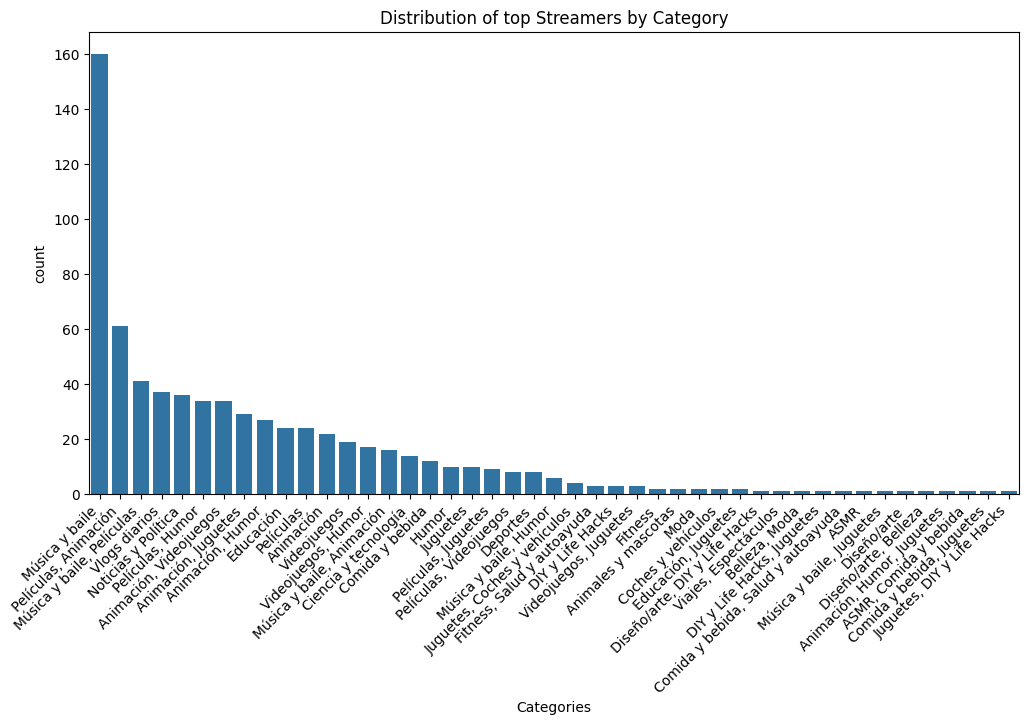

In [24]:
# Trend Analysis: Popular Categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of top Streamers by Category')
plt.show()

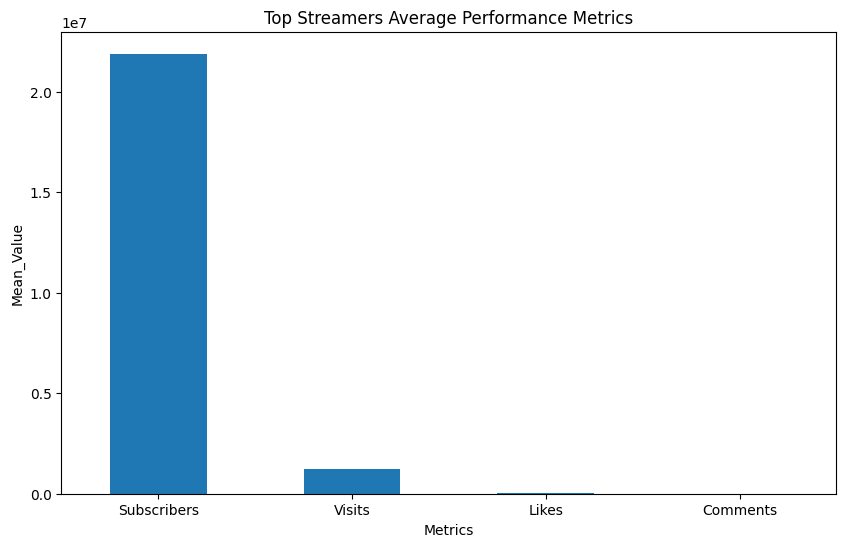

In [25]:
# Performance Metrics
average_metrics = top_streamers[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Top Streamers Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Mean_Value')
plt.show()

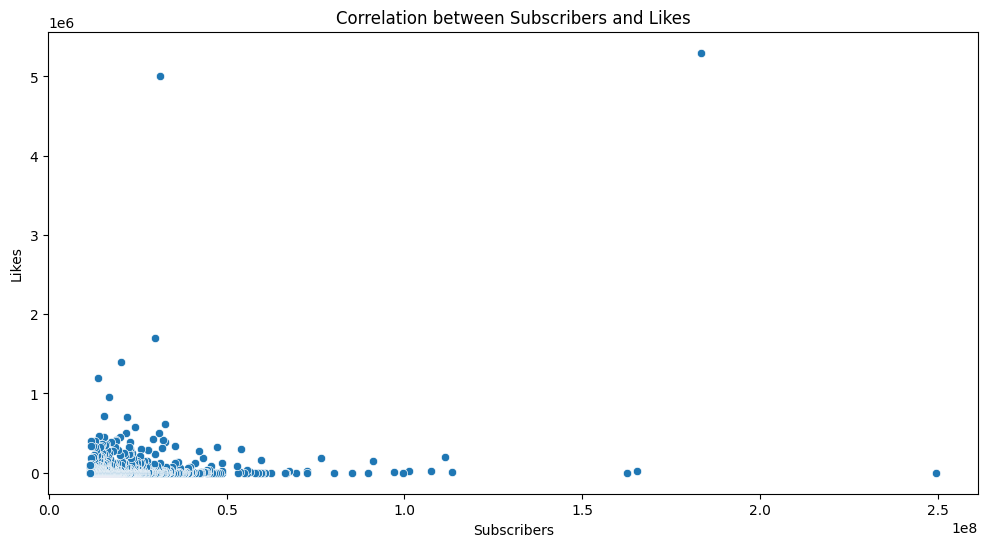

In [26]:
# Correlation Analysis: Subscribers vs Likes visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Subscribers', y='Likes', data=df)
plt.title('Correlation between Subscribers and Likes')
plt.xlabel('Subscribers')
plt.ylabel('Likes')
plt.show()

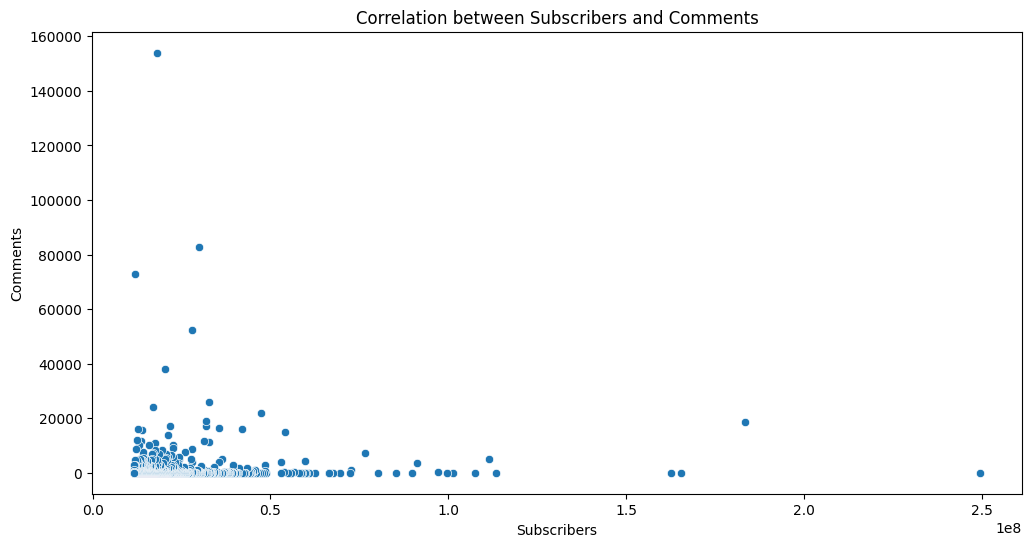

In [27]:
# Correlation Analysis: Subscribers vs Comments visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Subscribers', y='Comments', data=df)
plt.title('Correlation between Subscribers and Comments')
plt.xlabel('Subscribers')
plt.ylabel('Comments')
plt.show()

Correlation between Number of Subscribers and Likes:
 0.21163868368008423
Correlation between Number of Subscribers and Comments:
 0.036349826161053894


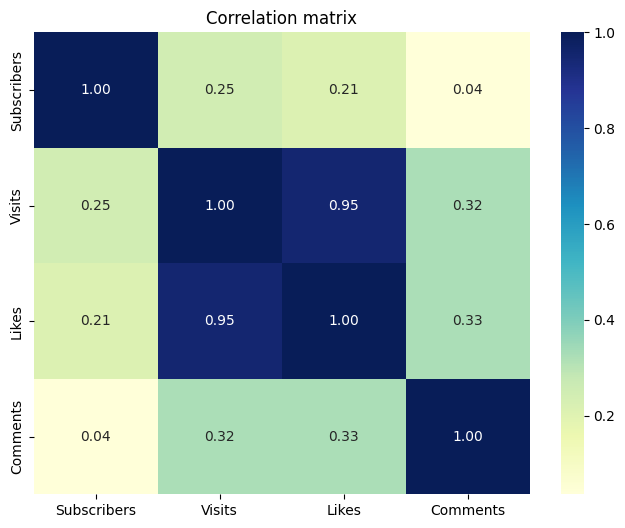

In [28]:
# Correlation between the number of sucscribers and the number of likes and comments
correl = df['Subscribers'].corr(df['Likes'])
print("Correlation between Number of Subscribers and Likes:\n", correl)

correl = df['Subscribers'].corr(df['Comments'])
print("Correlation between Number of Subscribers and Comments:\n", correl)

# Correlation matrix
correlation_matrix = df[['Subscribers', 'Visits', 'Likes', 'Comments']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

### 3. Audience study

In [29]:
# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Group by Country and calculate mean
country_stats = df.groupby('Country')['Subscribers'].mean()

# Display the statistics for audience distribution by country
print(country_stats)

Country
Arabia Saudita    1.865000e+07
Argelia           1.575000e+07
Argentina         1.772857e+07
Bangladesh        1.840000e+07
Brasil            1.948281e+07
Colombia          2.096250e+07
Ecuador           2.680000e+07
Egipto            1.398000e+07
El Salvador       2.190000e+07
España            1.615000e+07
Estados Unidos    2.138771e+07
Filipinas         2.007692e+07
Francia           2.147500e+07
India             2.416473e+07
Indonesia         1.980263e+07
Iraq              1.967500e+07
Japón             1.800000e+07
Jordania          1.420000e+07
Marruecos         1.290000e+07
México            1.986034e+07
Pakistán          2.107273e+07
Perú              1.570000e+07
Reino Unido       1.773333e+07
Rusia             1.705600e+07
Singapur          1.240000e+07
Somalia           1.170000e+07
Tailandia         2.001111e+07
Turquía           1.805000e+07
Unknown           2.415146e+07
Name: Subscribers, dtype: float64


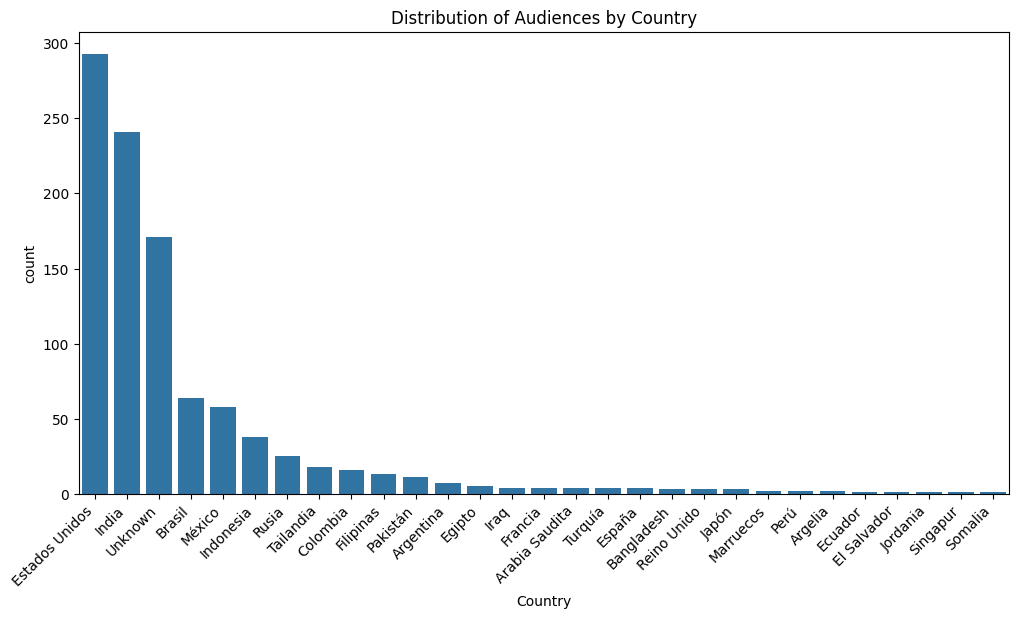

Categories            ASMR  ASMR, Comida y bebida     Animación  \
Country                                                           
Arabia Saudita         NaN                    NaN           NaN   
Argelia                NaN                    NaN           NaN   
Argentina              NaN                    NaN  2.570000e+07   
Bangladesh             NaN                    NaN           NaN   
Brasil                 NaN                    NaN  1.466667e+07   
Colombia               NaN                    NaN           NaN   
Egipto                 NaN                    NaN           NaN   
España                 NaN                    NaN           NaN   
Estados Unidos  15200000.0             13000000.0  1.465000e+07   
Filipinas              NaN                    NaN           NaN   
Francia                NaN                    NaN           NaN   
India                  NaN                    NaN           NaN   
Indonesia              NaN                    NaN           Na

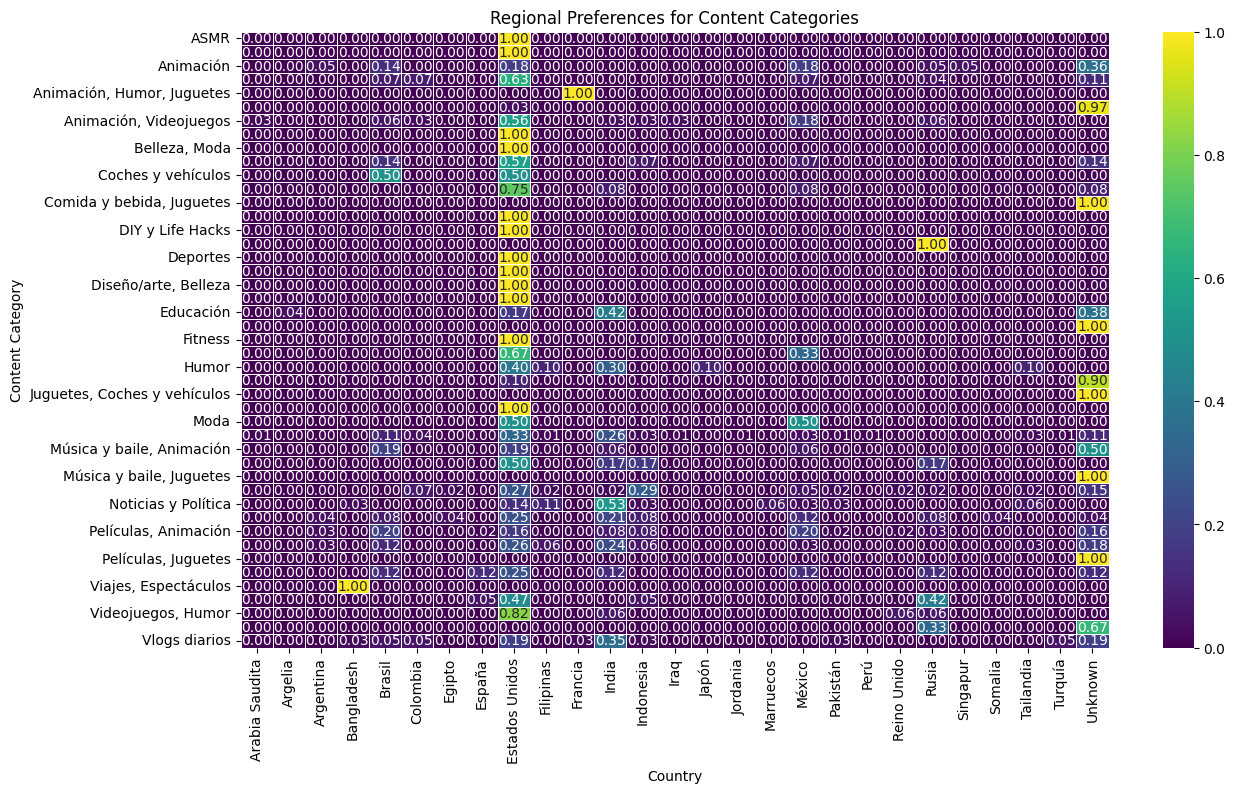

In [30]:
# Distribution of Audiences by Country visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Audiences by Country')
plt.show()

region_category_stats = df.groupby(['Country', 'Categories'])['Subscribers'].mean().unstack()
# Display the statistics for audience distribution by country and category
print(region_category_stats)

# Regional Preferences for Content Categories
plt.figure(figsize=(14, 8))
sns.heatmap(pd.crosstab(df['Categories'], df['Country'], normalize='index'), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Country')
plt.ylabel('Content Category')
plt.show()

### 4. Performance metrics

In [31]:
# Calculate the average metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

In [32]:
# Display average metrics
print("Average Subscribers:", average_metrics['Subscribers'])
print("Average Visits:", average_metrics['Visits'])
print("Average Likes:", average_metrics['Likes'])
print("Average Comments:", average_metrics['Comments'])

Average Subscribers: 21894400.0
Average Visits: 1209446.3155
Average Likes: 53632.592
Average Comments: 1288.768


C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1694455493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='Set2')


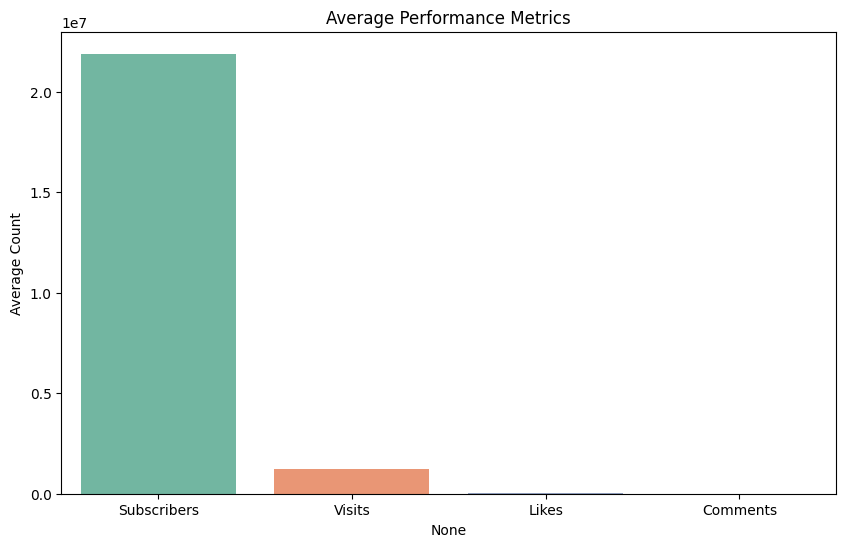

In [33]:
# Average metrics visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='Set2')
plt.title('Average Performance Metrics')
plt.ylabel('Average Count')
plt.show()

### 5. Content categories

In [34]:
# Explore the distribution of content categories
category_distribution = df['Categories'].value_counts()

In [35]:
# Number of streamers per category
print("Number of streamers per category:")
print(category_distribution)

Number of streamers per category:
Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Educación                              24
Películas                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor          

C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\3648403176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index, palette='viridis')


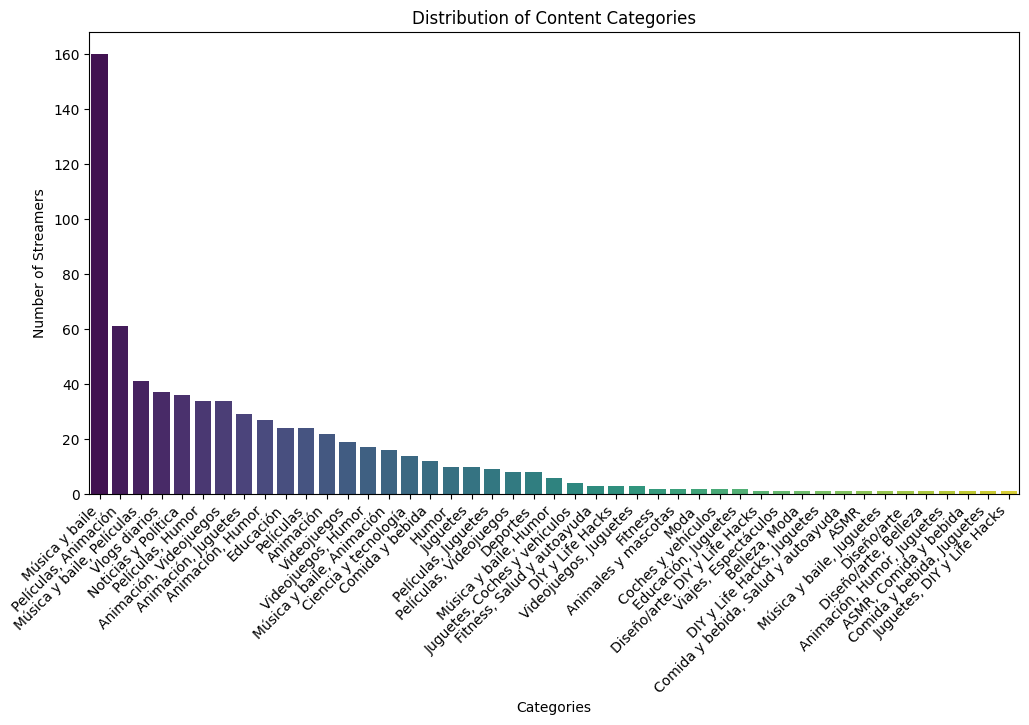

In [36]:
# Visualize the distribution of content categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1470220208.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Categories', y=metric, data=df, ci=None, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1470220208.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categories', y=metric, data=df, ci=None, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1470220208.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Categories', y=metric, data=df, ci=None, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11864\1470220208.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

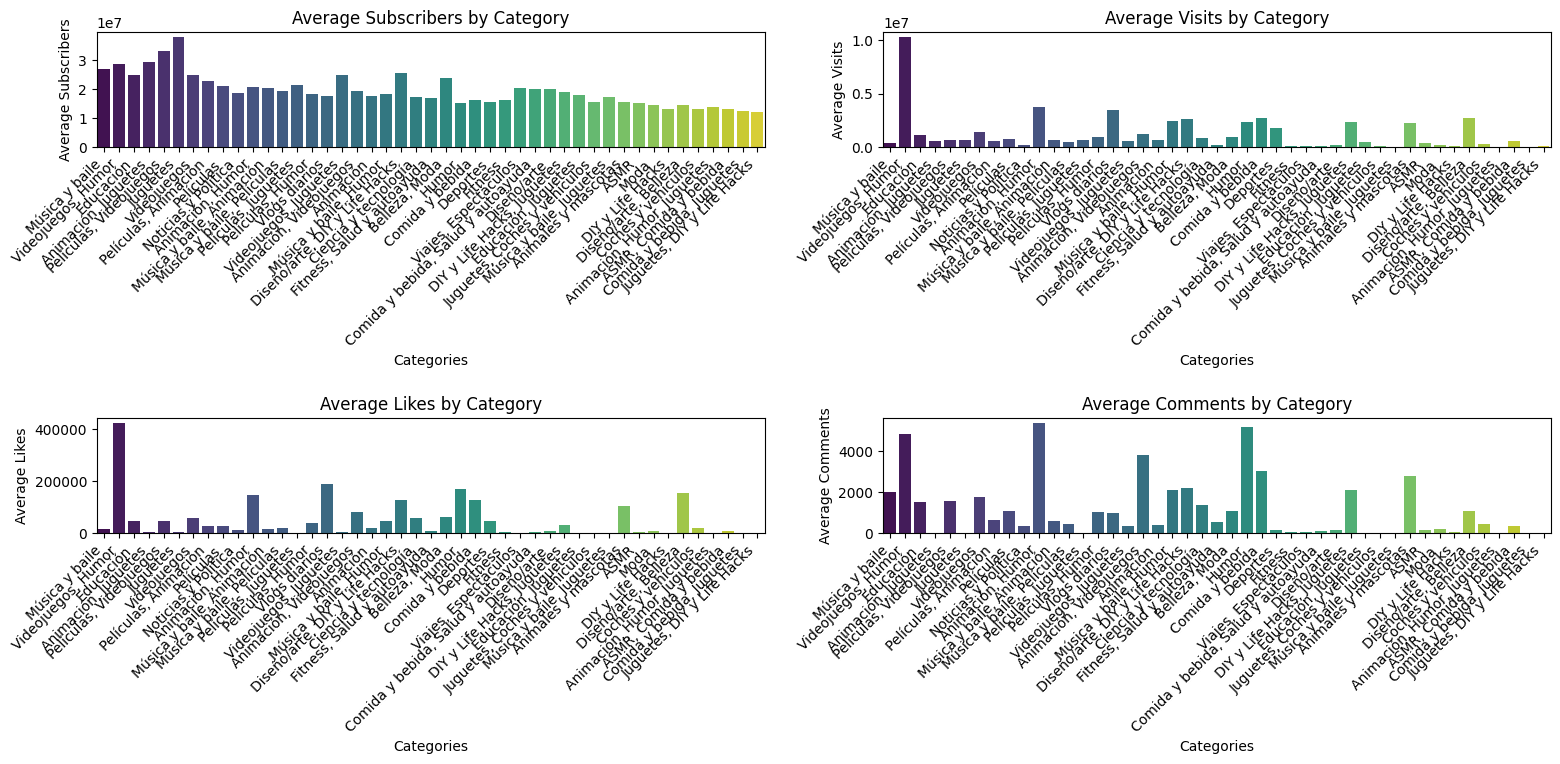

In [37]:
# Explore performance metrics across content categories
performance_metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']

plt.figure(figsize=(16, 8))

for metric in performance_metrics:
    plt.subplot(2, 2, performance_metrics.index(metric) + 1)
    sns.barplot(x='Categories', y=metric, data=df, ci=None, palette='viridis')
    plt.title(f'Average {metric} by Category')
    plt.xlabel('Categories')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout(pad=2)
plt.show()

In [38]:
for metric in performance_metrics:
    # Calculate average metric per category
    avg_metric_per_category = df.groupby('Categories')[metric].mean()

    threshold_value = 20000

    # Identify categories with exceptional performance (e.g., above a certain threshold)
    exceptional_categories = avg_metric_per_category[avg_metric_per_category > threshold_value]

    # Display the results
    print(f"\nCategories with exceptional {metric} performance:")
    print(exceptional_categories.sort_values(ascending=False))


Categories with exceptional Subscribers performance:
Categories
Juguetes                              3.788000e+07
Películas, Videojuegos                3.325000e+07
Animación, Juguetes                   2.937586e+07
Videojuegos, Humor                    2.876471e+07
Música y baile                        2.683688e+07
Diseño/arte, DIY y Life Hacks         2.570000e+07
Educación                             2.501250e+07
Videojuegos                           2.498421e+07
Videojuegos, Juguetes                 2.473333e+07
Belleza, Moda                         2.390000e+07
Películas, Animación                  2.269344e+07
Películas, Juguetes                   2.130000e+07
Películas                             2.114167e+07
Animación, Humor                      2.078519e+07
Música y baile, Animación             2.040000e+07
Viajes, Espectáculos                  2.040000e+07
Comida y bebida, Salud y autoayuda    2.010000e+07
Diseño/arte                           2.010000e+07
Música y baile, P

### 6. Brands and Collaborations:

In [39]:
# 6 - Brands and Collaborations
df_cleaned = df.dropna(subset=['Visits', 'Subscribers'])
print(df_cleaned[['Visits', 'Subscribers']].dtypes)

df_cleaned['Visits'] = pd.to_numeric(df_cleaned['Visits'], errors='coerce')
df_cleaned['Subscribers'] = pd.to_numeric(df_cleaned['Subscribers'], errors='coerce')

Visits         float64
Subscribers    float64
dtype: object


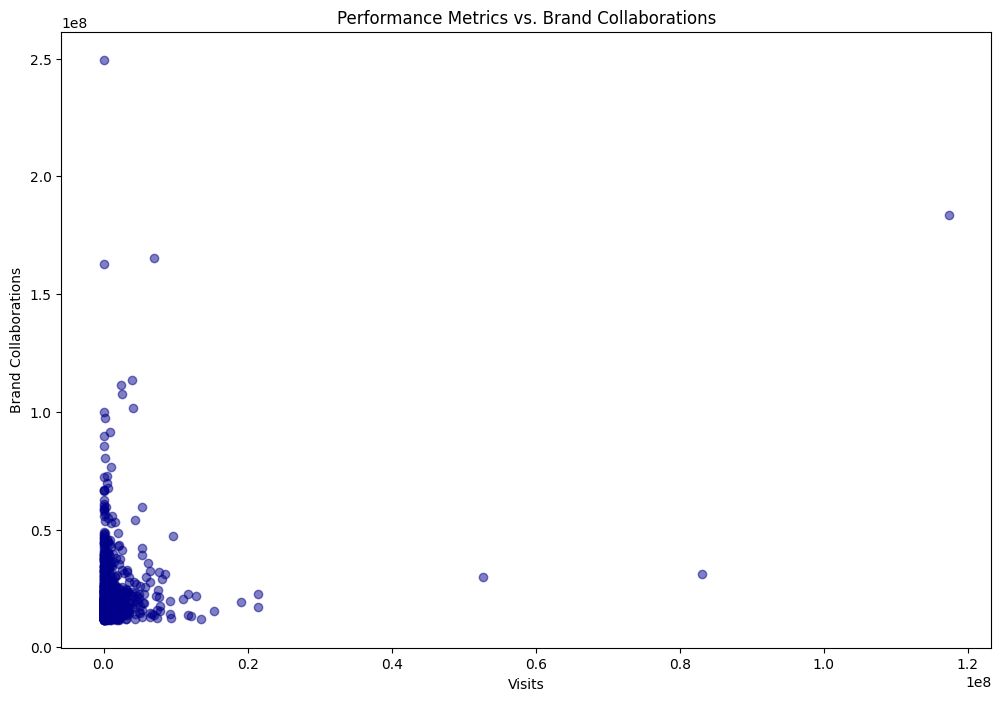

In [40]:
# Scatter plot of performance metrics vs. brand collaborations
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned['Visits'], df_cleaned['Subscribers'], c='darkblue', alpha=0.5)
plt.title('Performance Metrics vs. Brand Collaborations')
plt.xlabel('Visits')
plt.ylabel('Brand Collaborations')
plt.show()

In [41]:
# Calculate correlation coefficients
correlation_visits_links = df_cleaned['Visits'].corr(df_cleaned['Subscribers'])
print(f"Correlation between Visits and Brand Collaborations: {correlation_visits_links}")

Correlation between Visits and Brand Collaborations: 0.24520315821049418


### 7. Benchmarking 

In [42]:
# Average values for each performance metric
average_subscribers = df['Subscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

In [43]:
# Top-performing content creators
top_performers = df[
    (df['Subscribers'] > average_subscribers) &
    (df['Visits'] > average_visits) &
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments)]

In [44]:
# Top-performing content creators
print("Top-performing content creators:")
print(top_performers[['Rank', 'Username', 'Categories', 'Subscribers', 'Visits', 'Likes', 'Comments', 'Links']])

Top-performing content creators:
     Rank               Username                     Categories  Subscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                            NaN   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     